In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv('Global_superstore.csv',encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [8]:
df.shape

(51290, 24)

In [9]:
# data preprocesing

In [10]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [11]:
#df['postal code']
print(f'postal code contain {41296*100/51290}% of null values')

postal code contain 80.51472021836615% of null values


In [12]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [13]:
# data type

In [14]:
df.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

In [15]:
# check duplicates

In [16]:
df.duplicated().sum()

0

In [17]:
# extract all categorical columns and numerical columns

In [18]:
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)
num_cols=df.select_dtypes(exclude='object').columns
print(num_cols)

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Country', 'Market',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Order Priority'],
      dtype='object')
Index(['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost'],
      dtype='object')


In [19]:
#  univariate EDA

In [20]:
# find value counts of categorical columns namely category,segment ,subcategory region
#and ship mode and market depict the following 

In [21]:
cat_cols

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Country', 'Market',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Order Priority'],
      dtype='object')

In [22]:
a1= df['Category'].value_counts()
a1

Office Supplies    31273
Technology         10141
Furniture           9876
Name: Category, dtype: int64

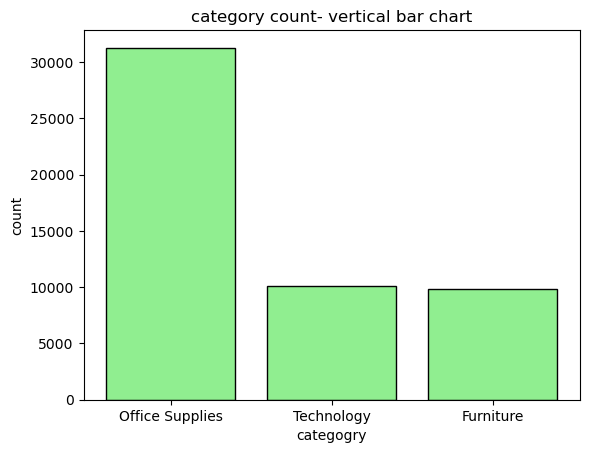

In [23]:
plt.bar(a1.index,a1.values,color='lightgreen',edgecolor='black',label='category counts')
plt.xlabel('categogry')
plt.ylabel('count')
plt.title('category count- vertical bar chart')
plt.show()

In [24]:
a2=df['Sub-Category'].value_counts()
a2

Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables          861
Name: Sub-Category, dtype: int64

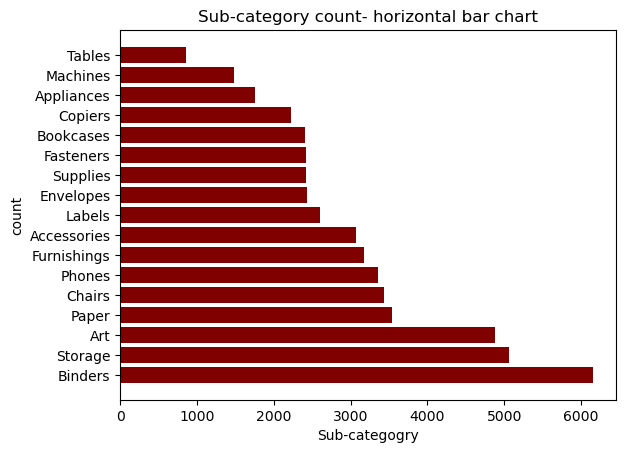

In [25]:
plt.barh(a2.index,a2.values,color='maroon')
plt.xlabel('Sub-categogry')
plt.ylabel('count')
plt.title('Sub-category count- horizontal bar chart')
plt.show()

In [26]:
a3=df['Segment'].value_counts()
a3

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64

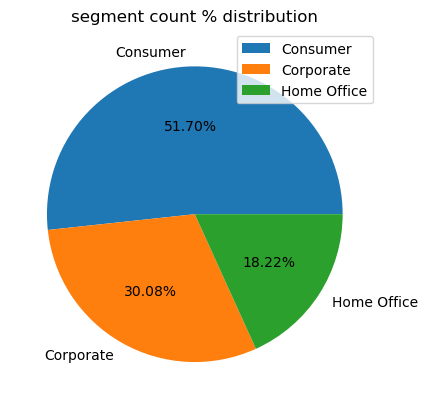

In [27]:
plt.pie(a3.values,labels=a3.index,autopct='%.2f%%')
plt.title('segment count % distribution')
plt.legend()
plt.show()

In [28]:
a4=df['Region'].value_counts()
a4

Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       2048
Caribbean          1690
Canada              384
Name: Region, dtype: int64

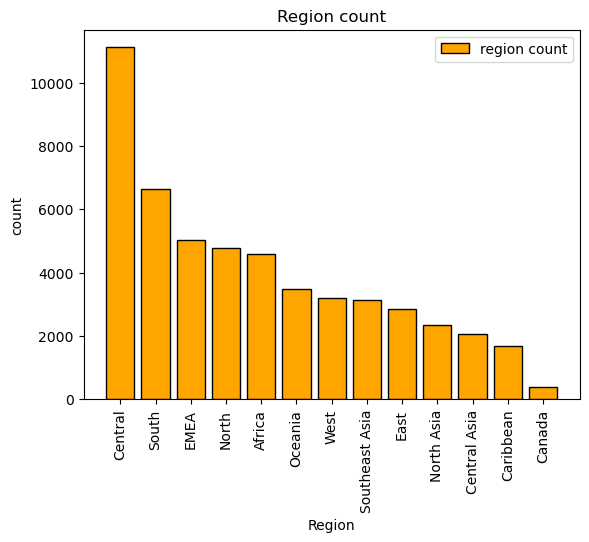

In [29]:
plt.bar(a4.index,a4.values,color='orange',edgecolor='black',label='region count')
plt.xlabel('Region')
plt.ylabel('count')
plt.title('Region count')
plt.legend()
plt.xticks(rotation=90)
plt.show()

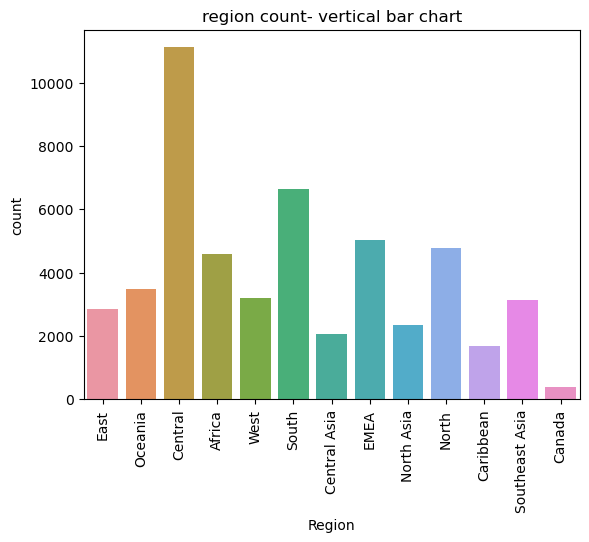

In [30]:
sns.countplot(x=df['Region'])
plt.title('region count- vertical bar chart')
plt.xticks(rotation=90)
plt.show()

In [31]:
a5=df['Ship Mode'].value_counts()
a5

Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: Ship Mode, dtype: int64

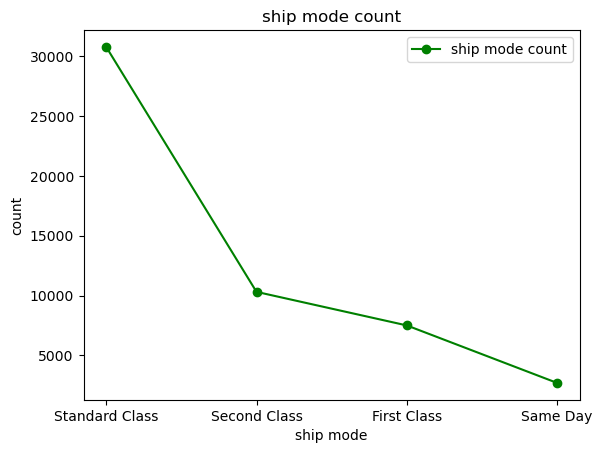

In [33]:
plt.plot(a5.index,a5.values,color='green',marker='o',label='ship mode count')
plt.xlabel('ship mode')
plt.ylabel('count')
plt.title('ship mode count')
plt.legend()
plt.show()

In [34]:
a6=df['Market'].value_counts()
a6

APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: Market, dtype: int64

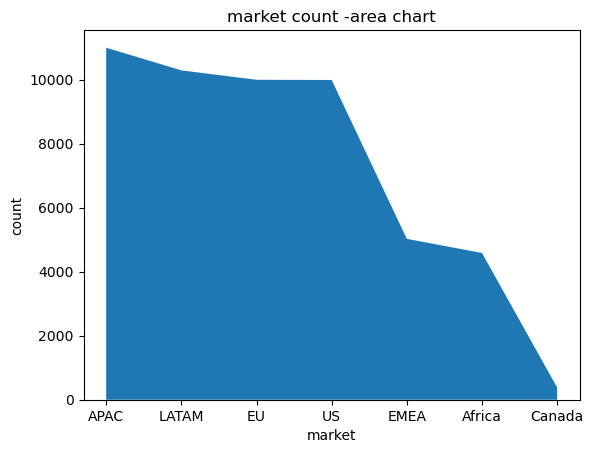

In [45]:
plt.stackplot(a6.index,a6.values)
plt.xlabel('market')
plt.ylabel('count')
plt.title('market count -area chart')
plt.show()

In [ ]:
# plot the following
# 1. HISTOGRAM DOR DISCOUNT
# 2.KDE PLOT /DISPLOT FOR QUANTITY

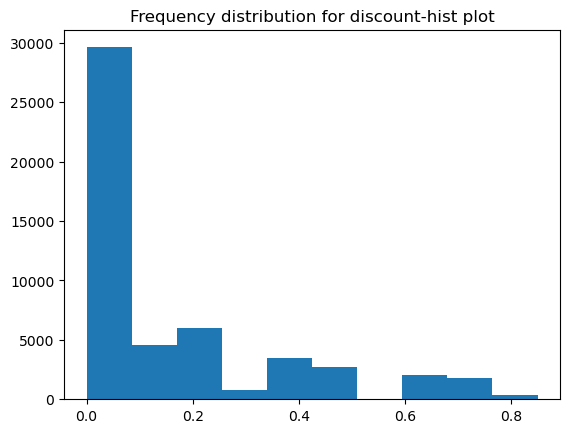

In [54]:
plt.hist(df['Discount'])
plt.title('Frequency distribution for discount-hist plot')
plt.show()

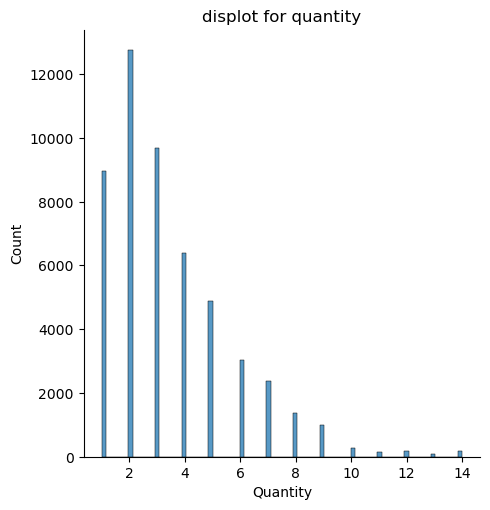

In [51]:
sns.displot(x=df['Quantity'])
plt.title('displot for quantity')
plt.show()

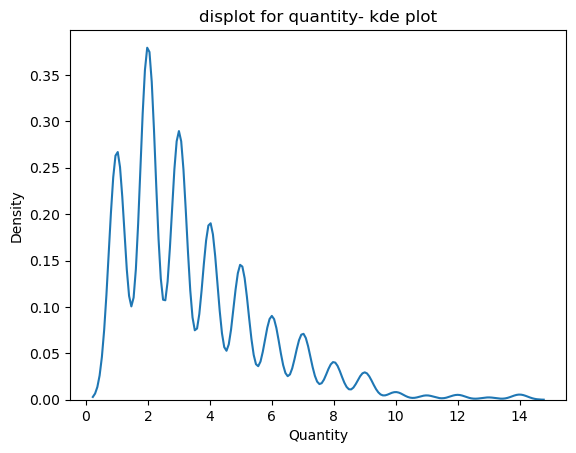

In [53]:
sns.kdeplot(x=df['Quantity'])
plt.title('displot for quantity- kde plot')
plt.show()

In [ ]:
# BIvariate analysis 
# 1. sales vs profit
# 2. profit vs shipping cost

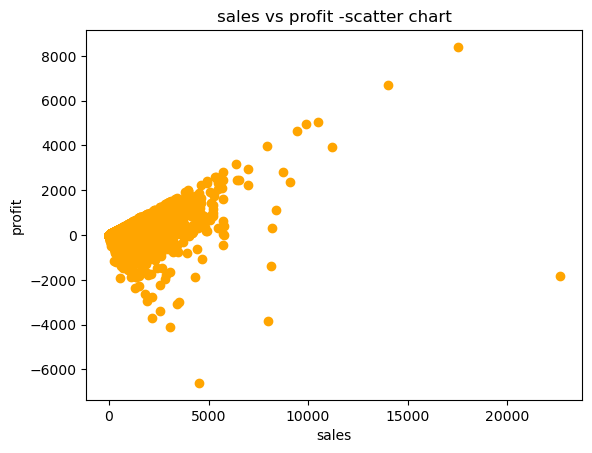

In [57]:
plt.scatter(df['Sales'],df['Profit'],color='orange')
plt.title('sales vs profit -scatter chart')
plt.xlabel('sales')
plt.ylabel('profit')
plt.show()

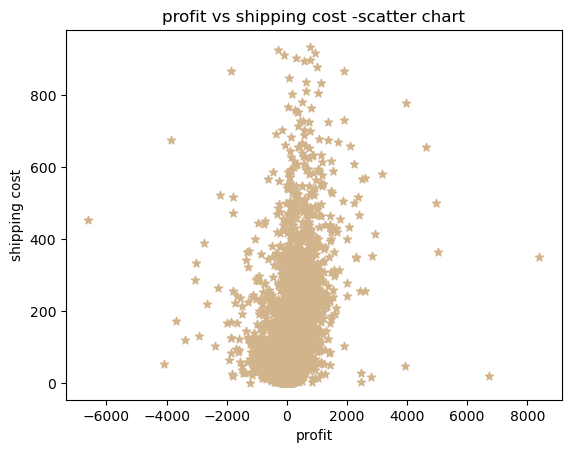

In [59]:
plt.scatter(df['Profit'],df['Shipping Cost'],color='tan',marker='*')
plt.title('profit vs shipping cost -scatter chart')
plt.xlabel('profit')
plt.ylabel('shipping cost')
plt.show()

In [ ]:
# DEPICT BOXPLOT FOR FOLLOWING
# 1,quantity based on segment 
# 2. profit based on ship mode

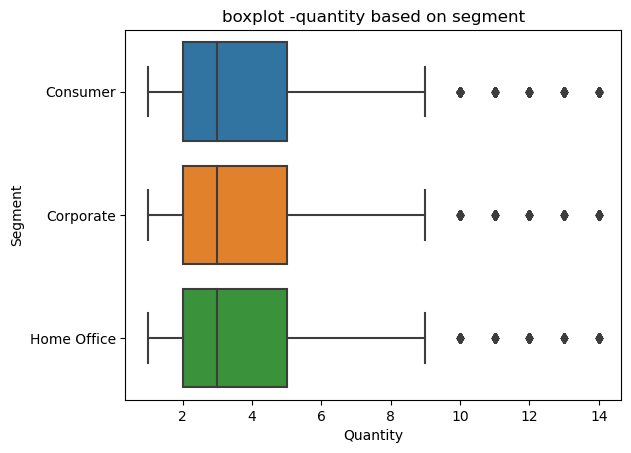

In [61]:
sns.boxplot(x=df['Quantity'],y=df['Segment'])
plt.title('boxplot -quantity based on segment')
plt.show()

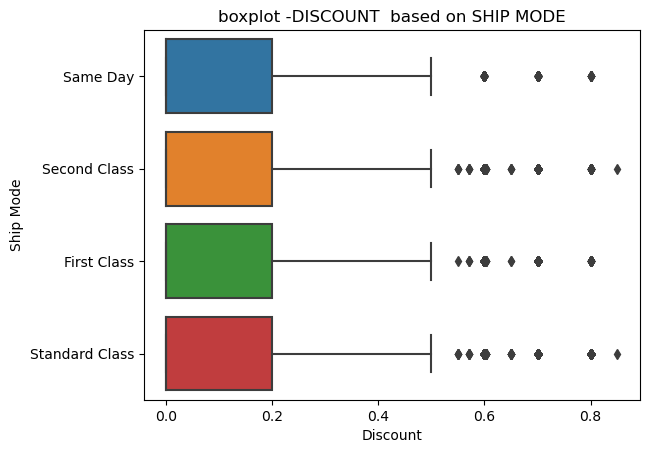

In [62]:
sns.boxplot(x=df['Discount'],y=df['Ship Mode'])
plt.title('boxplot -DISCOUNT  based on SHIP MODE')
plt.show()

In [ ]:
# 3 depict the following
# 1. discount vs market 
# 2. quantity vs category on violinplot

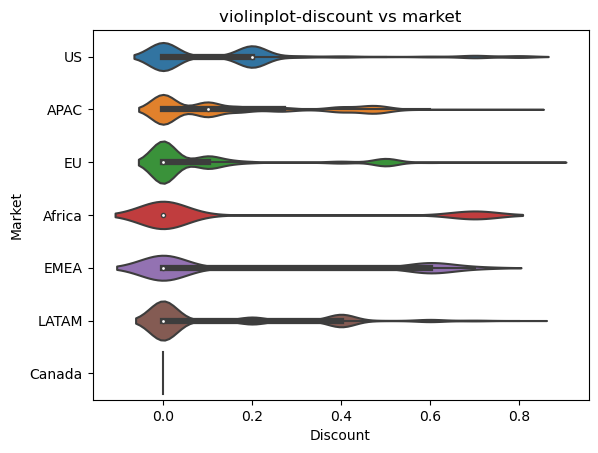

In [64]:
sns.violinplot(x=df['Discount'],y=df['Market'])
plt.title('violinplot-discount vs market')
plt.show()

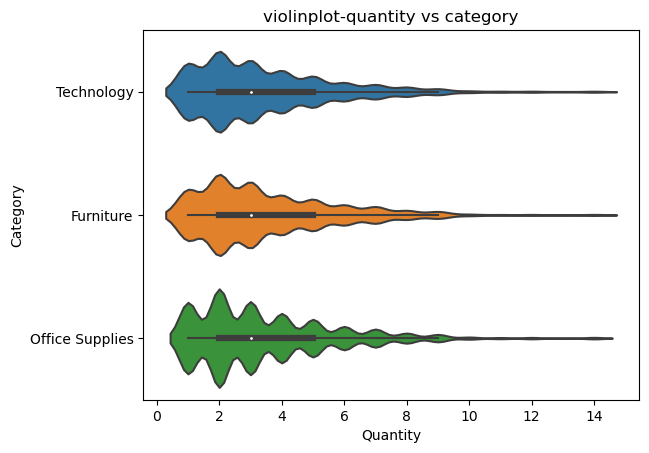

In [65]:
sns.violinplot(x=df['Quantity'],y=df['Category'])
plt.title('violinplot-quantity vs category')
plt.show()

In [ ]:
# 4 plot pairplot for all the categorical variables including sales profit quantity discount

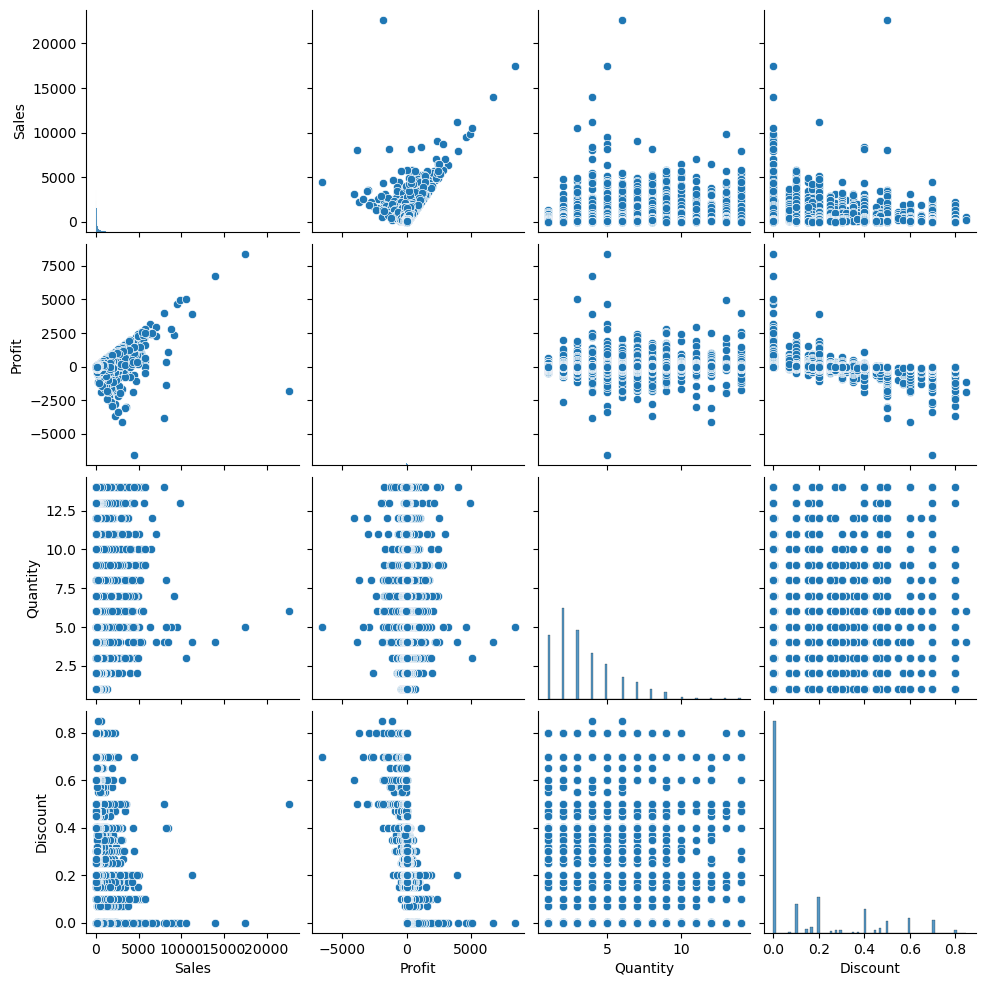

In [66]:
sns.pairplot(df,vars=['Sales','Profit','Quantity','Discount'])
plt.show()

In [68]:
print(num_cols)
print(cat_cols)

Index(['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost'],
      dtype='object')
Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Country', 'Market',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Order Priority'],
      dtype='object')


In [ ]:
# 5 depict correlation on heatmap 

In [70]:
corr=df.corr()
corr

C:\Users\admin\AppData\Local\Temp\ipykernel_6440\3182140910.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
Row ID,1.000000,0.009671,-0.043889,-0.173483,0.087594,-0.019037,-0.039076
Postal Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961,-0.025449
Sales,-0.043889,-0.023854,1.000000,0.313577,-0.086722,0.484918,0.768073
Quantity,-0.173483,0.012761,0.313577,1.000000,-0.019875,0.104365,0.272649
Discount,0.087594,0.058443,-0.086722,-0.019875,1.000000,-0.316490,-0.079055
Profit,-0.019037,-0.029961,0.484918,0.104365,-0.316490,1.000000,0.354441
Shipping Cost,-0.039076,-0.025449,0.768073,0.272649,-0.079055,0.354441,1.000000


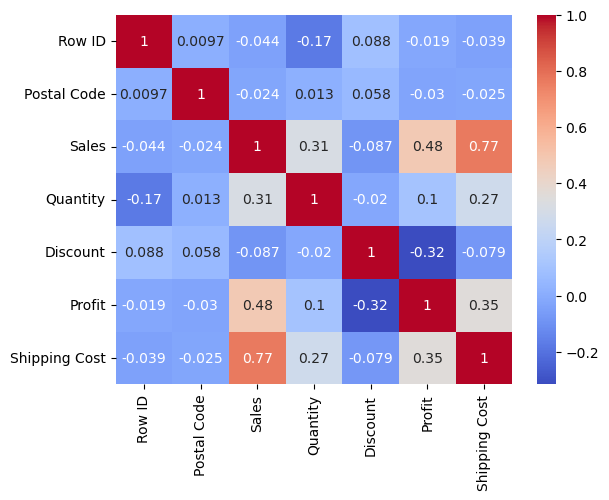

In [71]:
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()